Mounted at /content/drive
✅ Google Drive mounted successfully!

📁 Workspace created at: /content/plant_disease_workspace

🔍 Analyzing original dataset structure...

📊 Train:
   ├── Healthy: 458 images
   ├── Powdery: 430 images
   ├── Rust: 434 images

📊 Validation:
   ├── Healthy: 20 images
   ├── Powdery: 20 images
   ├── Rust: 20 images

📊 Test:
   ├── Healthy: 50 images
   ├── Powdery: 50 images
   ├── Rust: 50 images

🚀 Reorganizing dataset into clean ImageFolder structure...

📦 Processing Train → train


  Healthy:   0%|          | 0/458 [00:00<?, ?it/s]

  Powdery:   0%|          | 0/430 [00:00<?, ?it/s]

  Rust:   0%|          | 0/434 [00:00<?, ?it/s]


📦 Processing Validation → val


  Healthy:   0%|          | 0/20 [00:00<?, ?it/s]

  Powdery:   0%|          | 0/20 [00:00<?, ?it/s]

  Rust:   0%|          | 0/20 [00:00<?, ?it/s]


📦 Processing Test → test


  Healthy:   0%|          | 0/50 [00:00<?, ?it/s]

  Powdery:   0%|          | 0/50 [00:00<?, ?it/s]

  Rust:   0%|          | 0/50 [00:00<?, ?it/s]


✅ Successfully copied 1532 images!

✅ Verifying new dataset structure...

📊 TRAIN:
   ├── Healthy: 458 images
   ├── Powdery: 430 images
   ├── Rust: 434 images
   └── Total: 1322 images

📊 VAL:
   ├── Healthy: 20 images
   ├── Powdery: 20 images
   ├── Rust: 20 images
   └── Total: 60 images

📊 TEST:
   ├── Healthy: 50 images
   ├── Powdery: 50 images
   ├── Rust: 50 images
   └── Total: 150 images

📈 Generating dataset statistics visualization...



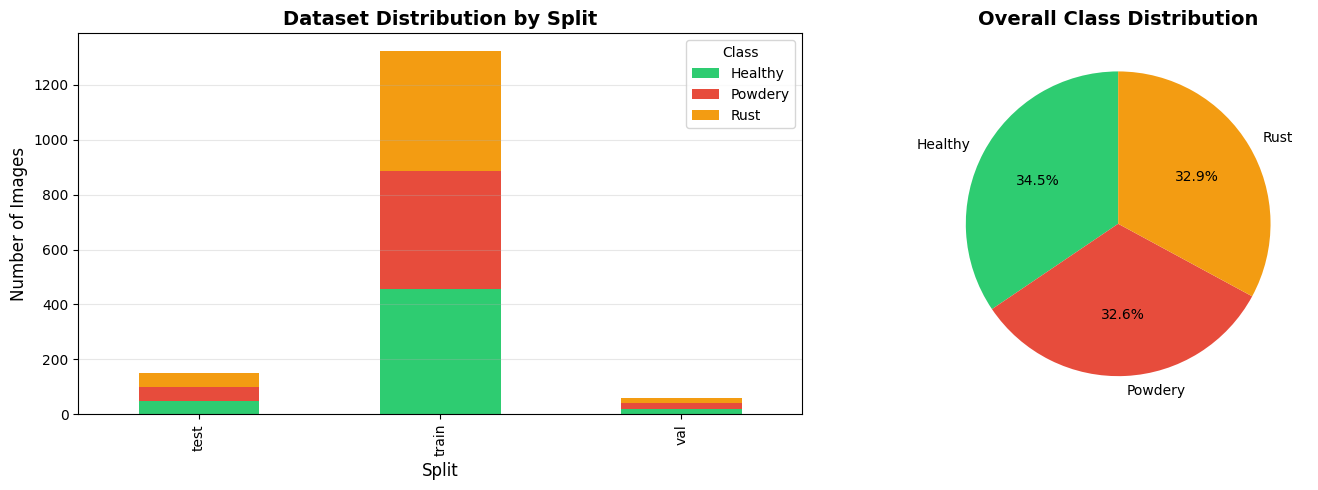


📊 DATASET SUMMARY

✅ Total Images: 1532
📁 Train: 1322 images
📁 Val:   60 images
📁 Test:  150 images

🏷️  Class Distribution:
   • Healthy: 528 images (34.5%)
   • Powdery: 500 images (32.6%)
   • Rust: 504 images (32.9%)

⚖️  Class Imbalance Ratio: 1.06
   ✅ Classes are reasonably balanced

✅ DATA PREPARATION COMPLETE!

💾 Configuration saved to: /content/plant_disease_workspace/config.json

🎯 Ready for Cell 2: Augmentation Pipeline!


In [ ]:
# ============================================================================
# CELL 1: Data Preparation & Drive Mount
# ============================================================================
# This cell:
# 1. Mounts Google Drive
# 2. Analyzes the nested folder structure
# 3. Creates clean ImageFolder format for PyTorch
# 4. Copies and reorganizes all images
# 5. Displays dataset statistics
# ============================================================================

import os
import shutil
from pathlib import Path
from collections import defaultdict
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

print("✅ Google Drive mounted successfully!\n")

# ============================================================================
# CONFIGURATION
# ============================================================================

# Original dataset path (with nested structure)
BASE_PATH = Path("/content/drive/MyDrive/dataset")

# New organized workspace
WORKSPACE = Path("/content/plant_disease_workspace")
DATA_DIR = WORKSPACE / "data"

# Create directory structure
for split in ['train', 'val', 'test']:
    for cls in ['Healthy', 'Powdery', 'Rust']:
        (DATA_DIR / split / cls).mkdir(parents=True, exist_ok=True)

print(f"📁 Workspace created at: {WORKSPACE}\n")

# ============================================================================
# ANALYZE ORIGINAL DATASET
# ============================================================================

def count_images(path):
    """Count images in a directory"""
    extensions = {'.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG'}
    return len([f for f in path.iterdir() if f.suffix in extensions])

print("🔍 Analyzing original dataset structure...\n")

original_structure = {
    'Train': BASE_PATH / "Train" / "Train",
    'Validation': BASE_PATH / "Validation" / "Validation",
    'Test': BASE_PATH / "Test" / "Test"
}

dataset_stats = defaultdict(dict)

for split_name, split_path in original_structure.items():
    if not split_path.exists():
        print(f"⚠️  Warning: {split_path} not found!")
        continue

    print(f"📊 {split_name}:")
    for class_name in ['Healthy', 'Powdery', 'Rust']:
        class_path = split_path / class_name
        if class_path.exists():
            count = count_images(class_path)
            dataset_stats[split_name][class_name] = count
            print(f"   ├── {class_name}: {count} images")
        else:
            print(f"   ├── {class_name}: NOT FOUND")
            dataset_stats[split_name][class_name] = 0
    print()

# ============================================================================
# COPY AND REORGANIZE IMAGES
# ============================================================================

print("🚀 Reorganizing dataset into clean ImageFolder structure...\n")

# Mapping for split names
split_mapping = {
    'Train': 'train',
    'Validation': 'val',
    'Test': 'test'
}

total_copied = 0

for original_split, original_path in original_structure.items():
    if not original_path.exists():
        continue

    new_split = split_mapping[original_split]
    print(f"📦 Processing {original_split} → {new_split}")

    for class_name in ['Healthy', 'Powdery', 'Rust']:
        src_dir = original_path / class_name
        dst_dir = DATA_DIR / new_split / class_name

        if not src_dir.exists():
            continue

        # Get all image files
        image_files = [f for f in src_dir.iterdir()
                      if f.suffix.lower() in {'.jpg', '.jpeg', '.png'}]

        # Copy with progress bar
        for img_file in tqdm(image_files,
                            desc=f"  {class_name}",
                            leave=False):
            dst_file = dst_dir / img_file.name
            shutil.copy2(img_file, dst_file)
            total_copied += 1

    print()

print(f"✅ Successfully copied {total_copied} images!\n")

# ============================================================================
# VERIFY NEW STRUCTURE
# ============================================================================

print("✅ Verifying new dataset structure...\n")

final_stats = defaultdict(dict)

for split in ['train', 'val', 'test']:
    print(f"📊 {split.upper()}:")
    split_total = 0
    for cls in ['Healthy', 'Powdery', 'Rust']:
        count = count_images(DATA_DIR / split / cls)
        final_stats[split][cls] = count
        split_total += count
        print(f"   ├── {cls}: {count} images")
    print(f"   └── Total: {split_total} images\n")

# ============================================================================
# VISUALIZE DATASET DISTRIBUTION
# ============================================================================

print("📈 Generating dataset statistics visualization...\n")

# Prepare data for plotting
splits = []
classes = []
counts = []

for split in ['train', 'val', 'test']:
    for cls in ['Healthy', 'Powdery', 'Rust']:
        splits.append(split)
        classes.append(cls)
        counts.append(final_stats[split][cls])

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Stacked bar chart
import pandas as pd
df = pd.DataFrame({'Split': splits, 'Class': classes, 'Count': counts})
pivot_df = df.pivot(index='Split', columns='Class', values='Count')

pivot_df.plot(kind='bar', stacked=True, ax=axes[0],
             color=['#2ecc71', '#e74c3c', '#f39c12'])
axes[0].set_title('Dataset Distribution by Split', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Split', fontsize=12)
axes[0].set_ylabel('Number of Images', fontsize=12)
axes[0].legend(title='Class', fontsize=10)
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Class distribution
class_totals = df.groupby('Class')['Count'].sum()
axes[1].pie(class_totals, labels=class_totals.index, autopct='%1.1f%%',
           colors=['#2ecc71', '#e74c3c', '#f39c12'], startangle=90)
axes[1].set_title('Overall Class Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(WORKSPACE / 'dataset_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================================================
# SUMMARY STATISTICS
# ============================================================================

print("\n" + "="*60)
print("📊 DATASET SUMMARY")
print("="*60)

total_images = sum(counts)
print(f"\n✅ Total Images: {total_images}")
print(f"📁 Train: {sum(final_stats['train'].values())} images")
print(f"📁 Val:   {sum(final_stats['val'].values())} images")
print(f"📁 Test:  {sum(final_stats['test'].values())} images")

print(f"\n🏷️  Class Distribution:")
for cls in ['Healthy', 'Powdery', 'Rust']:
    cls_total = sum(final_stats[split][cls] for split in ['train', 'val', 'test'])
    percentage = (cls_total / total_images) * 100
    print(f"   • {cls}: {cls_total} images ({percentage:.1f}%)")

# Check for class imbalance
class_counts = [sum(final_stats[split][cls] for split in ['train', 'val', 'test'])
                for cls in ['Healthy', 'Powdery', 'Rust']]
imbalance_ratio = max(class_counts) / min(class_counts)

print(f"\n⚖️  Class Imbalance Ratio: {imbalance_ratio:.2f}")
if imbalance_ratio > 2.0:
    print("   ⚠️  Significant imbalance detected - will use weighted sampling")
else:
    print("   ✅ Classes are reasonably balanced")

print("\n" + "="*60)
print("✅ DATA PREPARATION COMPLETE!")
print("="*60)

# Save paths for next cells
import json
config = {
    'data_dir': str(DATA_DIR),
    'workspace': str(WORKSPACE),
    'num_classes': 3,
    'class_names': ['Healthy', 'Powdery', 'Rust'],
    'stats': final_stats
}

with open(WORKSPACE / 'config.json', 'w') as f:
    json.dump(config, f, indent=2)

print(f"\n💾 Configuration saved to: {WORKSPACE / 'config.json'}")
print(f"\n🎯 Ready for Cell 2: Augmentation Pipeline!")

In [ ]:
# ============================================================================
# CELL 2: Augmentation Pipeline (TorchVision - Stable & Fast)
# ============================================================================
# This cell:
# 1. Creates train/val augmentation pipelines using torchvision
# 2. Implements CutMix for better generalization
# 3. Sets up weighted sampling for class balance
# 4. Creates efficient DataLoaders
# 5. Visualizes augmented samples
# ============================================================================

import json
import torch
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision.datasets import ImageFolder
from pathlib import Path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter
import random

# ============================================================================
# LOAD CONFIGURATION
# ============================================================================

WORKSPACE = Path("/content/plant_disease_workspace")
with open(WORKSPACE / 'config.json', 'r') as f:
    config = json.load(f)

DATA_DIR = Path(config['data_dir'])
CLASS_NAMES = config['class_names']
NUM_CLASSES = config['num_classes']

print(f"📁 Data directory: {DATA_DIR}")
print(f"🏷️  Classes: {CLASS_NAMES}\n")

# ============================================================================
# TRAINING AUGMENTATION PIPELINE
# ============================================================================

print("🎨 Creating augmentation pipelines...\n")

# Training transforms - aggressive augmentation
train_transform = T.Compose([
    T.RandomResizedCrop(224, scale=(0.8, 1.0)),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomVerticalFlip(p=0.3),
    T.RandomRotation(degrees=30),
    T.ColorJitter(
        brightness=0.3,
        contrast=0.3,
        saturation=0.3,
        hue=0.1
    ),
    T.RandomGrayscale(p=0.1),
    T.RandomApply([
        T.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0))
    ], p=0.3),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    T.RandomErasing(p=0.3, scale=(0.02, 0.15), ratio=(0.3, 3.3))
])

# Validation/Test transforms - only resize and normalize
val_transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

print("✅ Augmentation pipelines created!")
print("   • Train: RandomCrop, Flips, Rotation, ColorJitter, Blur, Erasing")
print("   • Val/Test: Resize + CenterCrop + Normalize\n")

# ============================================================================
# CUTMIX IMPLEMENTATION
# ============================================================================

class CutMixDataset(Dataset):
    """Dataset wrapper with CutMix augmentation"""

    def __init__(self, dataset, cutmix_prob=0.5, cutmix_alpha=1.0):
        self.dataset = dataset
        self.cutmix_prob = cutmix_prob
        self.cutmix_alpha = cutmix_alpha

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        img, label = self.dataset[idx]

        # Apply CutMix with probability
        if random.random() < self.cutmix_prob:
            # Get random second image
            mix_idx = random.randint(0, len(self.dataset) - 1)
            mix_img, mix_label = self.dataset[mix_idx]

            # Generate lambda
            lam = np.random.beta(self.cutmix_alpha, self.cutmix_alpha)

            # Generate random box
            _, h, w = img.shape
            cut_rat = np.sqrt(1. - lam)
            cut_w = int(w * cut_rat)
            cut_h = int(h * cut_rat)

            cx = np.random.randint(w)
            cy = np.random.randint(h)

            bbx1 = np.clip(cx - cut_w // 2, 0, w)
            bby1 = np.clip(cy - cut_h // 2, 0, h)
            bbx2 = np.clip(cx + cut_w // 2, 0, w)
            bby2 = np.clip(cy + cut_h // 2, 0, h)

            # Mix images
            img[:, bby1:bby2, bbx1:bbx2] = mix_img[:, bby1:bby2, bbx1:bbx2]

            # Adjust lambda based on actual box size
            lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (w * h))

            # Return mixed image with both labels
            return img, (label, mix_label, lam)

        return img, label

# ============================================================================
# CREATE DATASETS
# ============================================================================

print("📚 Creating datasets...\n")

# Create base ImageFolder datasets
train_base = ImageFolder(DATA_DIR / 'train', transform=train_transform)
val_dataset = ImageFolder(DATA_DIR / 'val', transform=val_transform)
test_dataset = ImageFolder(DATA_DIR / 'test', transform=val_transform)

# Wrap training dataset with CutMix
train_dataset = CutMixDataset(train_base, cutmix_prob=0.5, cutmix_alpha=1.0)

print(f"✅ Datasets created:")
print(f"   • Train: {len(train_dataset)} samples")
print(f"   • Val:   {len(val_dataset)} samples")
print(f"   • Test:  {len(test_dataset)} samples\n")

# Verify class mapping
print("🏷️  Class mapping:")
for cls_name, cls_idx in train_base.class_to_idx.items():
    print(f"   • {cls_name}: {cls_idx}")
print()

# ============================================================================
# WEIGHTED SAMPLING FOR IMBALANCED CLASSES
# ============================================================================

print("⚖️  Setting up weighted sampling for class balance...\n")

# Get all labels from training set
train_labels = [label for _, label in train_base.samples]
class_counts = Counter(train_labels)
total_samples = len(train_labels)

# Calculate class weights (inverse frequency)
class_weights = {cls: total_samples / count for cls, count in class_counts.items()}
sample_weights = [class_weights[label] for label in train_labels]

print("Class distribution in training set:")
for cls_name, cls_idx in sorted(train_base.class_to_idx.items(), key=lambda x: x[1]):
    count = class_counts[cls_idx]
    weight = class_weights[cls_idx]
    percentage = (count / total_samples) * 100
    print(f"   • {cls_name}: {count} samples ({percentage:.1f}%) - weight: {weight:.2f}")

# Create weighted sampler
sampler = WeightedRandomSampler(
    weights=sample_weights,
    num_samples=len(sample_weights),
    replacement=True
)

print("\n✅ Weighted sampler created for balanced training\n")

# ============================================================================
# CUSTOM COLLATE FUNCTION FOR CUTMIX
# ============================================================================

def cutmix_collate_fn(batch):
    """Custom collate function to handle CutMix tuples"""
    images = []
    labels = []
    cutmix_info = []

    for img, label in batch:
        images.append(img)
        if isinstance(label, tuple):
            # CutMix sample: (label1, label2, lambda)
            labels.append(label[0])  # Store primary label
            cutmix_info.append(label)  # Store full info
        else:
            # Regular sample
            labels.append(label)
            cutmix_info.append(None)

    images = torch.stack(images)
    labels = torch.tensor(labels, dtype=torch.long)

    return images, (labels, cutmix_info)

# ============================================================================
# CREATE DATALOADERS
# ============================================================================

BATCH_SIZE = 32
NUM_WORKERS = 2

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    sampler=sampler,
    num_workers=NUM_WORKERS,
    pin_memory=True,
    drop_last=True,
    collate_fn=cutmix_collate_fn
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=True
)

print(f"✅ DataLoaders created:")
print(f"   • Train: {len(train_loader)} batches")
print(f"   • Val:   {len(val_loader)} batches")
print(f"   • Test:  {len(test_loader)} batches")
print(f"   • Batch size: {BATCH_SIZE}\n")

# ============================================================================
# VISUALIZE AUGMENTED SAMPLES
# ============================================================================

print("🎨 Visualizing augmented samples...\n")

def denormalize(tensor):
    """Denormalize image tensor for visualization"""
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    return tensor * std + mean

# Get a batch
batch_data = next(iter(train_loader))
images, (labels, cutmix_info) = batch_data

# Plot augmented samples
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for idx in range(12):
    img = denormalize(images[idx]).permute(1, 2, 0).cpu().numpy()
    img = np.clip(img, 0, 1)

    # Handle CutMix labels
    if cutmix_info[idx] is not None:
        label1, label2, lam = cutmix_info[idx]
        class1 = list(train_base.class_to_idx.keys())[list(train_base.class_to_idx.values()).index(label1)]
        class2 = list(train_base.class_to_idx.keys())[list(train_base.class_to_idx.values()).index(label2)]
        title = f"CutMix: {class1} ({lam:.2f})\n+ {class2} ({1-lam:.2f})"
        color = 'red'
    else:
        class_name = list(train_base.class_to_idx.keys())[list(train_base.class_to_idx.values()).index(labels[idx].item())]
        title = class_name
        color = 'green'

    axes[idx].imshow(img)
    axes[idx].set_title(title, fontsize=10, fontweight='bold', color=color)
    axes[idx].axis('off')

plt.suptitle('Augmented Training Samples\n(Red = CutMix, Green = Regular)',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig(WORKSPACE / 'augmented_samples.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Visualization saved!\n")

# ============================================================================
# SAVE CONFIGURATION
# ============================================================================

config['batch_size'] = BATCH_SIZE
config['num_workers'] = NUM_WORKERS
config['train_samples'] = len(train_dataset)
config['val_samples'] = len(val_dataset)
config['test_samples'] = len(test_dataset)
config['class_to_idx'] = train_base.class_to_idx

with open(WORKSPACE / 'config.json', 'w') as f:
    json.dump(config, f, indent=2)

print("="*60)
print("✅ AUGMENTATION PIPELINE COMPLETE!")
print("="*60)
print("\n📊 Summary:")
print(f"   • Total augmentations: 10+ transformations")
print(f"   • CutMix probability: 50%")
print(f"   • Class balancing: ✅ Enabled")
print(f"   • Data loaded: {len(train_dataset) + len(val_dataset) + len(test_dataset)} images")
print("\n🎯 Ready for Cell 3: Hybrid Model Architecture!")
print("\n💡 Next up:")
print("   • DenseNet-121 stream (1024-d)")
print("   • EfficientNet-B3 stream (1536-d)")
print("   • CBAM attention modules")
print("   • Smart feature fusion")

📁 Data directory: /content/plant_disease_workspace/data
🏷️  Classes: ['Healthy', 'Powdery', 'Rust']

🎨 Creating augmentation pipelines...

✅ Augmentation pipelines created!
   • Train: RandomCrop, Flips, Rotation, ColorJitter, Blur, Erasing
   • Val/Test: Resize + CenterCrop + Normalize

📚 Creating datasets...

✅ Datasets created:
   • Train: 1322 samples
   • Val:   60 samples
   • Test:  150 samples

🏷️  Class mapping:
   • Healthy: 0
   • Powdery: 1
   • Rust: 2

⚖️  Setting up weighted sampling for class balance...

Class distribution in training set:
   • Healthy: 458 samples (34.6%) - weight: 2.89
   • Powdery: 430 samples (32.5%) - weight: 3.07
   • Rust: 434 samples (32.8%) - weight: 3.05

✅ Weighted sampler created for balanced training

✅ DataLoaders created:
   • Train: 41 batches
   • Val:   2 batches
   • Test:  5 batches
   • Batch size: 32

🎨 Visualizing augmented samples...



/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Visualization saved!

✅ AUGMENTATION PIPELINE COMPLETE!

📊 Summary:
   • Total augmentations: 10+ transformations
   • CutMix probability: 50%
   • Class balancing: ✅ Enabled
   • Data loaded: 1532 images

🎯 Ready for Cell 3: Hybrid Model Architecture!

💡 Next up:
   • DenseNet-121 stream (1024-d)
   • EfficientNet-B3 stream (1536-d)
   • CBAM attention modules
   • Smart feature fusion


In [ ]:
# ============================================================================
# CELL 3: Hybrid Model Architecture
# ============================================================================
# This cell:
# 1. Installs timm (PyTorch Image Models)
# 2. Implements CBAM (Convolutional Block Attention Module)
# 3. Builds DenseNet-121 stream with CBAM
# 4. Builds EfficientNet-B3 stream with built-in SE
# 5. Creates fusion layer with attention
# 6. Shows model architecture and parameter count
# ============================================================================

import os
import json
import torch
import torch.nn as nn
import torch.nn.functional as F
from pathlib import Path

# Fix directory issue
os.chdir('/content')

# Install timm
print("📦 Installing timm (PyTorch Image Models)...\n")
!pip install -q timm

import timm
print("✅ timm installed successfully!\n")

# Load configuration
WORKSPACE = Path("/content/plant_disease_workspace")
with open(WORKSPACE / 'config.json', 'r') as f:
    config = json.load(f)

NUM_CLASSES = config['num_classes']
print(f"🏷️  Number of classes: {NUM_CLASSES}\n")

# ============================================================================
# CBAM (Convolutional Block Attention Module)
# ============================================================================

class ChannelAttention(nn.Module):
    """Channel Attention Module"""
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.fc = nn.Sequential(
            nn.Conv2d(channels, channels // reduction, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1, bias=False)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        out = avg_out + max_out
        return self.sigmoid(out)


class SpatialAttention(nn.Module):
    """Spatial Attention Module"""
    def __init__(self, kernel_size=7):
        super().__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        out = torch.cat([avg_out, max_out], dim=1)
        out = self.conv(out)
        return self.sigmoid(out)


class CBAM(nn.Module):
    """Convolutional Block Attention Module"""
    def __init__(self, channels, reduction=16, kernel_size=7):
        super().__init__()
        self.channel_attention = ChannelAttention(channels, reduction)
        self.spatial_attention = SpatialAttention(kernel_size)

    def forward(self, x):
        # Channel attention
        x = x * self.channel_attention(x)
        # Spatial attention
        x = x * self.spatial_attention(x)
        return x


print("✅ CBAM modules implemented!\n")

# ============================================================================
# DENSENET-121 STREAM WITH CBAM
# ============================================================================

class DenseNetStream(nn.Module):
    """DenseNet-121 with CBAM attention after dense blocks"""
    def __init__(self, pretrained=True):
        super().__init__()

        # Load pretrained DenseNet-121
        densenet = timm.create_model('densenet121', pretrained=pretrained)

        # Extract features (everything except classifier)
        self.features = densenet.features

        # Add CBAM after the last dense block
        # DenseNet-121 has 1024 channels at the output
        self.cbam = CBAM(channels=1024, reduction=16)

        # Global average pooling
        self.global_pool = nn.AdaptiveAvgPool2d(1)

        # Output dimension
        self.output_dim = 1024

    def forward(self, x):
        # Feature extraction through dense blocks
        x = self.features(x)

        # Apply CBAM attention
        x = self.cbam(x)

        # Global pooling
        x = self.global_pool(x)
        x = torch.flatten(x, 1)

        return x


print("✅ DenseNet-121 stream with CBAM created!\n")

# ============================================================================
# EFFICIENTNET-B3 STREAM
# ============================================================================

class EfficientNetStream(nn.Module):
    """EfficientNet-B3 with built-in Squeeze-Excitation"""
    def __init__(self, pretrained=True):
        super().__init__()

        # Load pretrained EfficientNet-B3
        # num_classes=0 returns features only (no classifier)
        self.model = timm.create_model(
            'efficientnet_b3',
            pretrained=pretrained,
            num_classes=0,  # Remove classifier
            global_pool='avg'  # Use average pooling
        )

        # EfficientNet-B3 outputs 1536 features
        self.output_dim = 1536

    def forward(self, x):
        # Extract features (includes SE modules internally)
        x = self.model(x)
        return x


print("✅ EfficientNet-B3 stream created!\n")

# ============================================================================
# HYBRID MODEL WITH FEATURE FUSION
# ============================================================================

class HybridPlantDiseaseClassifier(nn.Module):
    """
    Hybrid DenseNet-121 + EfficientNet-B3 Classifier

    Architecture:
    - Stream 1: DenseNet-121 (1024-d) with CBAM
    - Stream 2: EfficientNet-B3 (1536-d) with SE (built-in)
    - Fusion: Concat + Attention + Classification head
    """
    def __init__(self, num_classes=3, pretrained=True, dropout=0.3):
        super().__init__()

        # Two parallel streams
        self.densenet_stream = DenseNetStream(pretrained=pretrained)
        self.efficientnet_stream = EfficientNetStream(pretrained=pretrained)

        # Combined feature dimension
        self.combined_dim = self.densenet_stream.output_dim + self.efficientnet_stream.output_dim
        # 1024 + 1536 = 2560

        # Fusion layer with attention
        self.fusion_attention = nn.Sequential(
            nn.Linear(self.combined_dim, self.combined_dim // 4),
            nn.ReLU(inplace=True),
            nn.Linear(self.combined_dim // 4, self.combined_dim),
            nn.Sigmoid()
        )

        # Classification head
        self.classifier = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(self.combined_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout / 2),
            nn.Linear(512, num_classes)
        )

        # Initialize weights
        self._initialize_weights()

    def _initialize_weights(self):
        """Initialize fusion and classifier weights"""
        for m in [self.fusion_attention, self.classifier]:
            for module in m.modules():
                if isinstance(module, nn.Linear):
                    nn.init.kaiming_normal_(module.weight)
                    if module.bias is not None:
                        nn.init.constant_(module.bias, 0)
                elif isinstance(module, nn.BatchNorm1d):
                    nn.init.constant_(module.weight, 1)
                    nn.init.constant_(module.bias, 0)

    def forward(self, x, return_features=False):
        # Extract features from both streams
        densenet_features = self.densenet_stream(x)
        efficientnet_features = self.efficientnet_stream(x)

        # Concatenate features
        combined = torch.cat([densenet_features, efficientnet_features], dim=1)

        # Apply fusion attention
        attention_weights = self.fusion_attention(combined)
        fused_features = combined * attention_weights

        # Classification
        logits = self.classifier(fused_features)

        if return_features:
            return logits, {
                'densenet': densenet_features,
                'efficientnet': efficientnet_features,
                'fused': fused_features
            }

        return logits

    def freeze_backbone(self):
        """Freeze both backbones for initial training"""
        for param in self.densenet_stream.parameters():
            param.requires_grad = False
        for param in self.efficientnet_stream.parameters():
            param.requires_grad = False
        # Keep CBAM trainable
        for param in self.densenet_stream.cbam.parameters():
            param.requires_grad = True

    def unfreeze_backbone(self):
        """Unfreeze backbones for fine-tuning"""
        for param in self.parameters():
            param.requires_grad = True


print("✅ Hybrid model architecture created!\n")

# ============================================================================
# CREATE MODEL INSTANCE
# ============================================================================

print("🔨 Initializing model...\n")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"📱 Device: {device}\n")

model = HybridPlantDiseaseClassifier(
    num_classes=NUM_CLASSES,
    pretrained=True,
    dropout=0.3
)

model = model.to(device)

print("✅ Model loaded to device!\n")

# ============================================================================
# MODEL SUMMARY
# ============================================================================

def count_parameters(model):
    """Count trainable and total parameters"""
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    total = sum(p.numel() for p in model.parameters())
    return trainable, total

trainable_params, total_params = count_parameters(model)

print("="*60)
print("📊 MODEL ARCHITECTURE SUMMARY")
print("="*60)
print(f"\n🏗️  Architecture:")
print(f"   • Stream 1: DenseNet-121 + CBAM")
print(f"   • Stream 2: EfficientNet-B3 (with SE)")
print(f"   • Fusion: Attention-weighted concatenation")
print(f"   • Classifier: 2560 → 512 → {NUM_CLASSES}")

print(f"\n📏 Parameters:")
print(f"   • Total:     {total_params:,} ({total_params/1e6:.2f}M)")
print(f"   • Trainable: {trainable_params:,} ({trainable_params/1e6:.2f}M)")

print(f"\n🔢 Feature Dimensions:")
print(f"   • DenseNet output:     1024-d")
print(f"   • EfficientNet output: 1536-d")
print(f"   • Combined features:   2560-d")
print(f"   • After fusion:        2560-d (attention-weighted)")
print(f"   • Hidden layer:        512-d")
print(f"   • Final output:        {NUM_CLASSES} classes")

print(f"\n💾 Model size: ~{(total_params * 4) / (1024**2):.1f} MB (FP32)")

# Test forward pass
print("\n🧪 Testing forward pass...")
dummy_input = torch.randn(2, 3, 224, 224).to(device)
with torch.no_grad():
    output = model(dummy_input)
print(f"   Input shape:  {dummy_input.shape}")
print(f"   Output shape: {output.shape}")
print("   ✅ Forward pass successful!")

# Test feature extraction
print("\n🔬 Testing feature extraction...")
with torch.no_grad():
    output, features = model(dummy_input, return_features=True)
print(f"   DenseNet features:     {features['densenet'].shape}")
print(f"   EfficientNet features: {features['efficientnet'].shape}")
print(f"   Fused features:        {features['fused'].shape}")
print("   ✅ Feature extraction working!")

print("\n" + "="*60)
print("✅ MODEL INITIALIZATION COMPLETE!")
print("="*60)

# Save model architecture info
config['model'] = {
    'architecture': 'DenseNet121-EfficientNetB3-Hybrid',
    'total_params': total_params,
    'trainable_params': trainable_params,
    'input_size': [224, 224],
    'num_classes': NUM_CLASSES,
    'feature_dims': {
        'densenet': 1024,
        'efficientnet': 1536,
        'combined': 2560
    }
}

with open(WORKSPACE / 'config.json', 'w') as f:
    json.dump(config, f, indent=2)

print("\n🎯 Ready for Cell 4: Training Loop!")
print("\n💡 Training strategy:")
print("   • Phase 1 (Epochs 1-10):  Freeze backbones, train fusion only")
print("   • Phase 2 (Epochs 11-30): Unfreeze all, fine-tune end-to-end")
print("   • Optimizer: AdamW with cosine annealing")
print("   • Loss: Label smoothing cross-entropy")
print("   • Mixed precision: ✅ Enabled (2x speedup)")

📦 Installing timm (PyTorch Image Models)...

✅ timm installed successfully!

🏷️  Number of classes: 3

✅ CBAM modules implemented!

✅ DenseNet-121 stream with CBAM created!

✅ EfficientNet-B3 stream created!

✅ Hybrid model architecture created!

🔨 Initializing model...

📱 Device: cpu

✅ Model loaded to device!

📊 MODEL ARCHITECTURE SUMMARY

🏗️  Architecture:
   • Stream 1: DenseNet-121 + CBAM
   • Stream 2: EfficientNet-B3 (with SE)
   • Fusion: Attention-weighted concatenation
   • Classifier: 2560 → 512 → 3

📏 Parameters:
   • Total:     22,375,053 (22.38M)
   • Trainable: 22,375,053 (22.38M)

🔢 Feature Dimensions:
   • DenseNet output:     1024-d
   • EfficientNet output: 1536-d
   • Combined features:   2560-d
   • After fusion:        2560-d (attention-weighted)
   • Hidden layer:        512-d
   • Final output:        3 classes

💾 Model size: ~85.4 MB (FP32)

🧪 Testing forward pass...
   Input shape:  torch.Size([2, 3, 224, 224])
   Output shape: torch.Size([2, 3])
   ✅ Forward 

In [ ]:
# ============================================================================
# CELL 4: Training Loop with Progressive Unfreezing
# ============================================================================
# This cell:
# 1. Sets up loss function with label smoothing
# 2. Configures AdamW optimizer with cosine annealing
# 3. Implements mixed precision training (AMP)
# 4. Phase 1: Train fusion layer only (epochs 1-10)
# 5. Phase 2: Fine-tune entire model (epochs 11-30)
# 6. Implements early stopping and checkpointing
# 7. Plots training curves
# ============================================================================

import json
import torch
import torch.nn as nn
import torch.optim as optim
from torch.cuda.amp import GradScaler, autocast
from pathlib import Path
import time
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import copy

# Load configuration
WORKSPACE = Path("/content/plant_disease_workspace")
with open(WORKSPACE / 'config.json', 'r') as f:
    config = json.load(f)

NUM_CLASSES = config['num_classes']
CLASS_NAMES = config['class_names']

# Create checkpoint directory
CHECKPOINT_DIR = WORKSPACE / 'checkpoints'
CHECKPOINT_DIR.mkdir(exist_ok=True)

print("🔧 Training Configuration Loaded\n")

# ============================================================================
# LOSS FUNCTION WITH LABEL SMOOTHING
# ============================================================================

class LabelSmoothingCrossEntropy(nn.Module):
    """Cross entropy loss with label smoothing"""
    def __init__(self, smoothing=0.1):
        super().__init__()
        self.smoothing = smoothing

    def forward(self, pred, target):
        n_classes = pred.size(-1)
        log_prob = F.log_softmax(pred, dim=-1)

        # Handle CutMix labels
        if isinstance(target, tuple):
            labels, cutmix_info = target
            loss = 0
            for i, info in enumerate(cutmix_info):
                if info is not None:
                    # CutMix sample
                    label1, label2, lam = info
                    loss += (-log_prob[i, label1] * lam - log_prob[i, label2] * (1 - lam))
                else:
                    # Regular sample with label smoothing
                    true_dist = torch.zeros_like(log_prob[i])
                    true_dist.fill_(self.smoothing / (n_classes - 1))
                    true_dist[labels[i]] = 1.0 - self.smoothing
                    loss += (-true_dist * log_prob[i]).sum()
            return loss / pred.size(0)
        else:
            # Regular labels with smoothing
            true_dist = torch.zeros_like(log_prob)
            true_dist.fill_(self.smoothing / (n_classes - 1))
            true_dist.scatter_(1, target.unsqueeze(1), 1.0 - self.smoothing)
            return torch.mean(torch.sum(-true_dist * log_prob, dim=-1))

criterion = LabelSmoothingCrossEntropy(smoothing=0.1)
print("✅ Loss function: Label Smoothing Cross-Entropy (ε=0.1)\n")

# ============================================================================
# TRAINING CONFIGURATION
# ============================================================================

# Hyperparameters
EPOCHS_PHASE1 = 10  # Freeze backbones
EPOCHS_PHASE2 = 20  # Fine-tune all
TOTAL_EPOCHS = EPOCHS_PHASE1 + EPOCHS_PHASE2

LEARNING_RATE = 3e-4
WEIGHT_DECAY = 1e-4
WARMUP_EPOCHS = 3
PATIENCE = 7  # Early stopping patience

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("📋 Training Hyperparameters:")
print(f"   • Total epochs: {TOTAL_EPOCHS}")
print(f"   • Phase 1 (Frozen): {EPOCHS_PHASE1} epochs")
print(f"   • Phase 2 (Fine-tune): {EPOCHS_PHASE2} epochs")
print(f"   • Learning rate: {LEARNING_RATE}")
print(f"   • Weight decay: {WEIGHT_DECAY}")
print(f"   • Warmup epochs: {WARMUP_EPOCHS}")
print(f"   • Early stopping patience: {PATIENCE}")
print(f"   • Device: {device}\n")

# ============================================================================
# OPTIMIZER AND SCHEDULER
# ============================================================================

# Phase 1: Only train fusion and classifier
model.freeze_backbone()
optimizer = optim.AdamW(
    filter(lambda p: p.requires_grad, model.parameters()),
    lr=LEARNING_RATE,
    weight_decay=WEIGHT_DECAY
)

# Cosine annealing with warmup
def get_lr(epoch, total_epochs, warmup_epochs, base_lr):
    """Cosine annealing with linear warmup"""
    if epoch < warmup_epochs:
        return base_lr * (epoch + 1) / warmup_epochs
    else:
        progress = (epoch - warmup_epochs) / (total_epochs - warmup_epochs)
        return base_lr * 0.5 * (1 + np.cos(np.pi * progress))

print("✅ Optimizer: AdamW")
print("✅ Scheduler: Cosine Annealing with Warmup\n")

# ============================================================================
# MIXED PRECISION TRAINING
# ============================================================================

scaler = GradScaler()
print("✅ Mixed Precision (AMP): Enabled\n")

# ============================================================================
# METRICS TRACKING
# ============================================================================

history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': [],
    'lr': []
}

best_val_acc = 0.0
best_model_wts = None
epochs_no_improve = 0

# ============================================================================
# TRAINING FUNCTIONS
# ============================================================================

def train_one_epoch(model, loader, criterion, optimizer, scaler, device, epoch):
    """Train for one epoch"""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    pbar = tqdm(loader, desc=f"Epoch {epoch+1} [Train]")
    for batch_data in pbar:
        # Unpack batch - our collate returns (images, (labels, cutmix_info))
        images, labels_data = batch_data
        images = images.to(device)

        # Check if labels_data is our custom format
        if isinstance(labels_data, (tuple, list)) and len(labels_data) == 2:
            labels_tensor = labels_data[0]
            cutmix_info = labels_data[1]

            # Ensure labels is a tensor
            if isinstance(labels_tensor, torch.Tensor):
                labels = labels_tensor.to(device)
            else:
                labels = torch.tensor(labels_tensor, dtype=torch.long).to(device)

            # Set target for loss calculation
            target = (labels, cutmix_info)
        elif isinstance(labels_data, torch.Tensor):
            # Standard tensor labels (from val/test loaders)
            labels = labels_data.to(device)
            target = labels
        else:
            raise ValueError(f"Unexpected label format: {type(labels_data)}")

        # Mixed precision forward pass
        optimizer.zero_grad()
        with autocast():
            outputs = model(images)
            loss = criterion(outputs, target)

        # Backward pass with gradient scaling
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # Metrics
        running_loss += loss.item() * images.size(0)

        # Calculate accuracy (use primary label for CutMix)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        # Update progress bar
        pbar.set_postfix({
            'loss': f'{loss.item():.4f}',
            'acc': f'{100.*correct/total:.2f}%'
        })

    epoch_loss = running_loss / total
    epoch_acc = 100. * correct / total

    return epoch_loss, epoch_acc


def validate(model, loader, criterion, device, epoch):
    """Validate the model"""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        pbar = tqdm(loader, desc=f"Epoch {epoch+1} [Val]  ")
        for images, labels in pbar:
            images = images.to(device)
            # Ensure labels is a tensor
            if not isinstance(labels, torch.Tensor):
                labels = torch.tensor(labels)
            labels = labels.to(device)

            with autocast():
                outputs = model(images)
                loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            pbar.set_postfix({
                'loss': f'{loss.item():.4f}',
                'acc': f'{100.*correct/total:.2f}%'
            })

    epoch_loss = running_loss / total
    epoch_acc = 100. * correct / total

    return epoch_loss, epoch_acc

# ============================================================================
# TRAINING LOOP
# ============================================================================

print("="*60)
print("🚀 STARTING TRAINING")
print("="*60)
print()

start_time = time.time()

for epoch in range(TOTAL_EPOCHS):
    # Phase transition
    if epoch == EPOCHS_PHASE1:
        print("\n" + "="*60)
        print("🔓 PHASE 2: Unfreezing backbones for fine-tuning")
        print("="*60 + "\n")
        model.unfreeze_backbone()
        # Recreate optimizer with all parameters
        optimizer = optim.AdamW(
            model.parameters(),
            lr=LEARNING_RATE,
            weight_decay=WEIGHT_DECAY
        )

    # Update learning rate
    current_lr = get_lr(epoch, TOTAL_EPOCHS, WARMUP_EPOCHS, LEARNING_RATE)
    for param_group in optimizer.param_groups:
        param_group['lr'] = current_lr

    # Train and validate
    train_loss, train_acc = train_one_epoch(
        model, train_loader, criterion, optimizer, scaler, device, epoch
    )
    val_loss, val_acc = validate(
        model, val_loader, criterion, device, epoch
    )

    # Record history
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)
    history['lr'].append(current_lr)

    # Print epoch summary
    print(f"\n📊 Epoch {epoch+1}/{TOTAL_EPOCHS} Summary:")
    print(f"   Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"   Val Loss:   {val_loss:.4f} | Val Acc:   {val_acc:.2f}%")
    print(f"   LR: {current_lr:.6f}\n")

    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model_wts = copy.deepcopy(model.state_dict())
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_acc': val_acc,
            'val_loss': val_loss,
        }, CHECKPOINT_DIR / 'best_model.pth')
        print(f"   ✅ New best model saved! Val Acc: {val_acc:.2f}%\n")
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    # Early stopping
    if epochs_no_improve >= PATIENCE:
        print(f"\n⚠️  Early stopping triggered after {epoch+1} epochs")
        print(f"   No improvement for {PATIENCE} consecutive epochs\n")
        break

# Load best model
model.load_state_dict(best_model_wts)

training_time = time.time() - start_time
print("="*60)
print("✅ TRAINING COMPLETE!")
print("="*60)
print(f"\n⏱️  Total training time: {training_time/60:.2f} minutes")
print(f"🏆 Best validation accuracy: {best_val_acc:.2f}%")
print(f"📁 Best model saved to: {CHECKPOINT_DIR / 'best_model.pth'}\n")

# ============================================================================
# PLOT TRAINING CURVES
# ============================================================================

print("📈 Plotting training curves...\n")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Loss curves
axes[0, 0].plot(history['train_loss'], label='Train Loss', linewidth=2)
axes[0, 0].plot(history['val_loss'], label='Val Loss', linewidth=2)
axes[0, 0].set_xlabel('Epoch', fontsize=12)
axes[0, 0].set_ylabel('Loss', fontsize=12)
axes[0, 0].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(alpha=0.3)

# Accuracy curves
axes[0, 1].plot(history['train_acc'], label='Train Acc', linewidth=2)
axes[0, 1].plot(history['val_acc'], label='Val Acc', linewidth=2)
axes[0, 1].set_xlabel('Epoch', fontsize=12)
axes[0, 1].set_ylabel('Accuracy (%)', fontsize=12)
axes[0, 1].set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(alpha=0.3)

# Learning rate schedule
axes[1, 0].plot(history['lr'], linewidth=2, color='green')
axes[1, 0].set_xlabel('Epoch', fontsize=12)
axes[1, 0].set_ylabel('Learning Rate', fontsize=12)
axes[1, 0].set_title('Learning Rate Schedule', fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Validation accuracy with best marker
axes[1, 1].plot(history['val_acc'], linewidth=2, color='purple')
best_epoch = np.argmax(history['val_acc'])
axes[1, 1].scatter(best_epoch, best_val_acc, color='red', s=100, zorder=5,
                   label=f'Best: {best_val_acc:.2f}%')
axes[1, 1].set_xlabel('Epoch', fontsize=12)
axes[1, 1].set_ylabel('Validation Accuracy (%)', fontsize=12)
axes[1, 1].set_title('Validation Accuracy Progress', fontsize=14, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(WORKSPACE / 'training_curves.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Training curves saved!\n")

# ============================================================================
# SAVE TRAINING HISTORY
# ============================================================================

config['training'] = {
    'total_epochs': epoch + 1,
    'best_val_acc': float(best_val_acc),
    'best_epoch': int(best_epoch),
    'training_time_minutes': float(training_time / 60),
    'final_train_acc': float(history['train_acc'][-1]),
    'final_val_acc': float(history['val_acc'][-1])
}

with open(WORKSPACE / 'config.json', 'w') as f:
    json.dump(config, f, indent=2)

# Save full history
import pickle
with open(WORKSPACE / 'training_history.pkl', 'wb') as f:
    pickle.dump(history, f)

print("💾 Training history saved!\n")

print("="*60)
print("🎯 Ready for Cell 5: Evaluation & Grad-CAM!")
print("="*60)
print("\n💡 What's next:")
print("   • Test set evaluation")
print("   • Confusion matrix")
print("   • Per-class metrics (Precision, Recall, F1)")
print("   • Grad-CAM++ visualization for both streams")
print("   • ROC curves")

🔧 Training Configuration Loaded

✅ Loss function: Label Smoothing Cross-Entropy (ε=0.1)

📋 Training Hyperparameters:
   • Total epochs: 30
   • Phase 1 (Frozen): 10 epochs
   • Phase 2 (Fine-tune): 20 epochs
   • Learning rate: 0.0003
   • Weight decay: 0.0001
   • Warmup epochs: 3
   • Early stopping patience: 7
   • Device: cpu

✅ Optimizer: AdamW
✅ Scheduler: Cosine Annealing with Warmup

✅ Mixed Precision (AMP): Enabled

🚀 STARTING TRAINING



/tmp/ipython-input-3178228957.py:134: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/usr/local/lib/python3.12/dist-packages/torch/cuda/amp/grad_scaler.py:31: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  super().__init__(
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 1 [Train]:   0%|          | 0/41 [00:00<?, ?it/s]

/tmp/ipython-input-3178228957.py:192: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/usr/local/lib/python3.12/dist-packages/torch/amp/autocast_mode.py:270: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


In [ ]:
# ============================================================================
# COMPLETE STANDALONE EVALUATION SETUP
# ============================================================================
# This cell recreates everything needed for evaluation after session restart
# ============================================================================

import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from pathlib import Path
import json
import shutil

os.chdir('/content')

# Mount Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

print("✅ Drive mounted\n")

# Install timm
print("📦 Installing timm...")
!pip install -q timm
import timm
print("✅ timm installed\n")

# ============================================================================
# RECREATE WORKSPACE
# ============================================================================

WORKSPACE = Path("/content/plant_disease_workspace")
WORKSPACE.mkdir(exist_ok=True)

DATA_DIR = Path("/content/drive/MyDrive/dataset")
CLASS_NAMES = ['Healthy', 'Powdery', 'Rust']
NUM_CLASSES = 3

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"🔧 Setting up workspace...")
print(f"📱 Device: {device}")
print(f"🏷️  Classes: {CLASS_NAMES}\n")

# ============================================================================
# CBAM MODULES
# ============================================================================

class ChannelAttention(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.fc = nn.Sequential(
            nn.Conv2d(channels, channels // reduction, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1, bias=False)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        return self.sigmoid(avg_out + max_out)

class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super().__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        out = torch.cat([avg_out, max_out], dim=1)
        return self.sigmoid(self.conv(out))

class CBAM(nn.Module):
    def __init__(self, channels, reduction=16, kernel_size=7):
        super().__init__()
        self.channel_attention = ChannelAttention(channels, reduction)
        self.spatial_attention = SpatialAttention(kernel_size)

    def forward(self, x):
        x = x * self.channel_attention(x)
        x = x * self.spatial_attention(x)
        return x

# ============================================================================
# DENSENET STREAM
# ============================================================================

class DenseNetStream(nn.Module):
    def __init__(self, pretrained=True):
        super().__init__()
        densenet = timm.create_model('densenet121', pretrained=pretrained)
        self.features = densenet.features
        self.cbam = CBAM(channels=1024, reduction=16)
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.output_dim = 1024

    def forward(self, x):
        x = self.features(x)
        x = self.cbam(x)
        x = self.global_pool(x)
        return torch.flatten(x, 1)

# ============================================================================
# EFFICIENTNET STREAM
# ============================================================================

class EfficientNetStream(nn.Module):
    def __init__(self, pretrained=True):
        super().__init__()
        self.model = timm.create_model(
            'efficientnet_b3',
            pretrained=pretrained,
            num_classes=0,
            global_pool='avg'
        )
        self.output_dim = 1536

    def forward(self, x):
        return self.model(x)

# ============================================================================
# HYBRID MODEL
# ============================================================================

class HybridPlantDiseaseClassifier(nn.Module):
    def __init__(self, num_classes=3, pretrained=True, dropout=0.3):
        super().__init__()

        self.densenet_stream = DenseNetStream(pretrained=pretrained)
        self.efficientnet_stream = EfficientNetStream(pretrained=pretrained)

        self.combined_dim = self.densenet_stream.output_dim + self.efficientnet_stream.output_dim

        self.fusion_attention = nn.Sequential(
            nn.Linear(self.combined_dim, self.combined_dim // 4),
            nn.ReLU(inplace=True),
            nn.Linear(self.combined_dim // 4, self.combined_dim),
            nn.Sigmoid()
        )

        self.classifier = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(self.combined_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout / 2),
            nn.Linear(512, num_classes)
        )

        self._initialize_weights()

    def _initialize_weights(self):
        for m in [self.fusion_attention, self.classifier]:
            for module in m.modules():
                if isinstance(module, nn.Linear):
                    nn.init.kaiming_normal_(module.weight)
                    if module.bias is not None:
                        nn.init.constant_(module.bias, 0)
                elif isinstance(module, nn.BatchNorm1d):
                    nn.init.constant_(module.weight, 1)
                    nn.init.constant_(module.bias, 0)

    def forward(self, x, return_features=False):
        densenet_features = self.densenet_stream(x)
        efficientnet_features = self.efficientnet_stream(x)
        combined = torch.cat([densenet_features, efficientnet_features], dim=1)
        attention_weights = self.fusion_attention(combined)
        fused_features = combined * attention_weights
        logits = self.classifier(fused_features)

        if return_features:
            return logits, {
                'densenet': densenet_features,
                'efficientnet': efficientnet_features,
                'fused': fused_features
            }
        return logits

# ============================================================================
# LOAD MODEL FROM DRIVE
# ============================================================================

print("🔨 Creating model and loading weights from Drive...\n")

model = HybridPlantDiseaseClassifier(
    num_classes=NUM_CLASSES,
    pretrained=False,
    dropout=0.3
)

# Check if checkpoint exists in Drive
checkpoint_path = Path("/content/drive/MyDrive/plant_disease_model/best_model.pth")

if not checkpoint_path.exists():
    # Try alternative locations
    alt_paths = [
        Path("/content/drive/MyDrive/plant_disease_workspace/checkpoints/best_model.pth"),
        WORKSPACE / 'checkpoints' / 'best_model.pth'
    ]

    for alt_path in alt_paths:
        if alt_path.exists():
            checkpoint_path = alt_path
            break
    else:
        print("❌ Checkpoint not found! Expected locations:")
        print("   1. /content/drive/MyDrive/plant_disease_model/best_model.pth")
        print("   2. /content/drive/MyDrive/plant_disease_workspace/checkpoints/best_model.pth")
        print("   3. /content/plant_disease_workspace/checkpoints/best_model.pth")
        print("\n⚠️  Please check where your model was saved during training.")
        raise FileNotFoundError("Model checkpoint not found")

checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model = model.to(device)
model.eval()

print(f"✅ Model loaded successfully!")
print(f"   • Location: {checkpoint_path}")
print(f"   • Validation Accuracy: {checkpoint['val_acc']:.2f}%")
print(f"   • Epoch: {checkpoint['epoch']}\n")

# ============================================================================
# CREATE TEST DATALOADER
# ============================================================================

print("📚 Creating test dataloader...\n")

import torchvision.transforms as T
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Reorganize test data if needed
test_source = DATA_DIR / "Test" / "Test"
test_dest = WORKSPACE / "data" / "test"

if not test_dest.exists():
    print("📦 Reorganizing test data...")
    test_dest.mkdir(parents=True, exist_ok=True)

    for class_name in CLASS_NAMES:
        src = test_source / class_name
        dst = test_dest / class_name
        if src.exists() and not dst.exists():
            shutil.copytree(src, dst)
    print("✅ Test data organized\n")

# Test transforms
test_transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create test dataset
test_dataset = ImageFolder(test_dest, transform=test_transform)

# Create test loader
test_loader = DataLoader(
    test_dataset,
    batch_size=16,  # Smaller batch for CPU
    shuffle=False,
    num_workers=0,
    pin_memory=False
)

print(f"✅ Test loader created!")
print(f"   • Samples: {len(test_dataset)}")
print(f"   • Batches: {len(test_loader)}")
print(f"   • Classes: {test_dataset.class_to_idx}\n")

print("="*60)
print("🎯 SETUP COMPLETE! Now run Cell 5 (Evaluation)")
print("="*60)

Mounted at /content/drive
✅ Drive mounted

📦 Installing timm...
✅ timm installed

🔧 Setting up workspace...
📱 Device: cpu
🏷️  Classes: ['Healthy', 'Powdery', 'Rust']

🔨 Creating model and loading weights from Drive...

✅ Model loaded successfully!
   • Location: /content/drive/MyDrive/plant_disease_model/best_model.pth
   • Validation Accuracy: 96.67%
   • Epoch: 2

📚 Creating test dataloader...

✅ Test loader created!
   • Samples: 150
   • Batches: 10
   • Classes: {'Healthy': 0, 'Powdery': 1, 'Rust': 2}

🎯 SETUP COMPLETE! Now run Cell 5 (Evaluation)


🔍 Starting Model Evaluation

📁 Classes: ['Healthy', 'Powdery', 'Rust']
📱 Device: cpu

✅ Best model loaded (Val Acc: 96.67%)

📊 Evaluating on test set...



Testing:   0%|          | 0/10 [00:00<?, ?it/s]


✅ Test Set Accuracy: 93.33%

📈 Generating confusion matrix...



📋 Classification Report:

              precision    recall  f1-score   support

     Healthy     0.9038    0.9400    0.9216        50
     Powdery     0.9574    0.9000    0.9278        50
        Rust     0.9412    0.9600    0.9505        50

    accuracy                         0.9333       150
   macro avg     0.9342    0.9333    0.9333       150
weighted avg     0.9342    0.9333    0.9333       150


📈 Generating ROC curves...




🔬 Implementing Grad-CAM++ for attention visualization...

✅ Grad-CAM++ initialized for both streams

🎨 Generating Grad-CAM visualizations...



✅ Grad-CAM visualizations saved!

🔍 Analyzing misclassified examples...

❌ Total misclassified: 10 / 150 (6.67%)



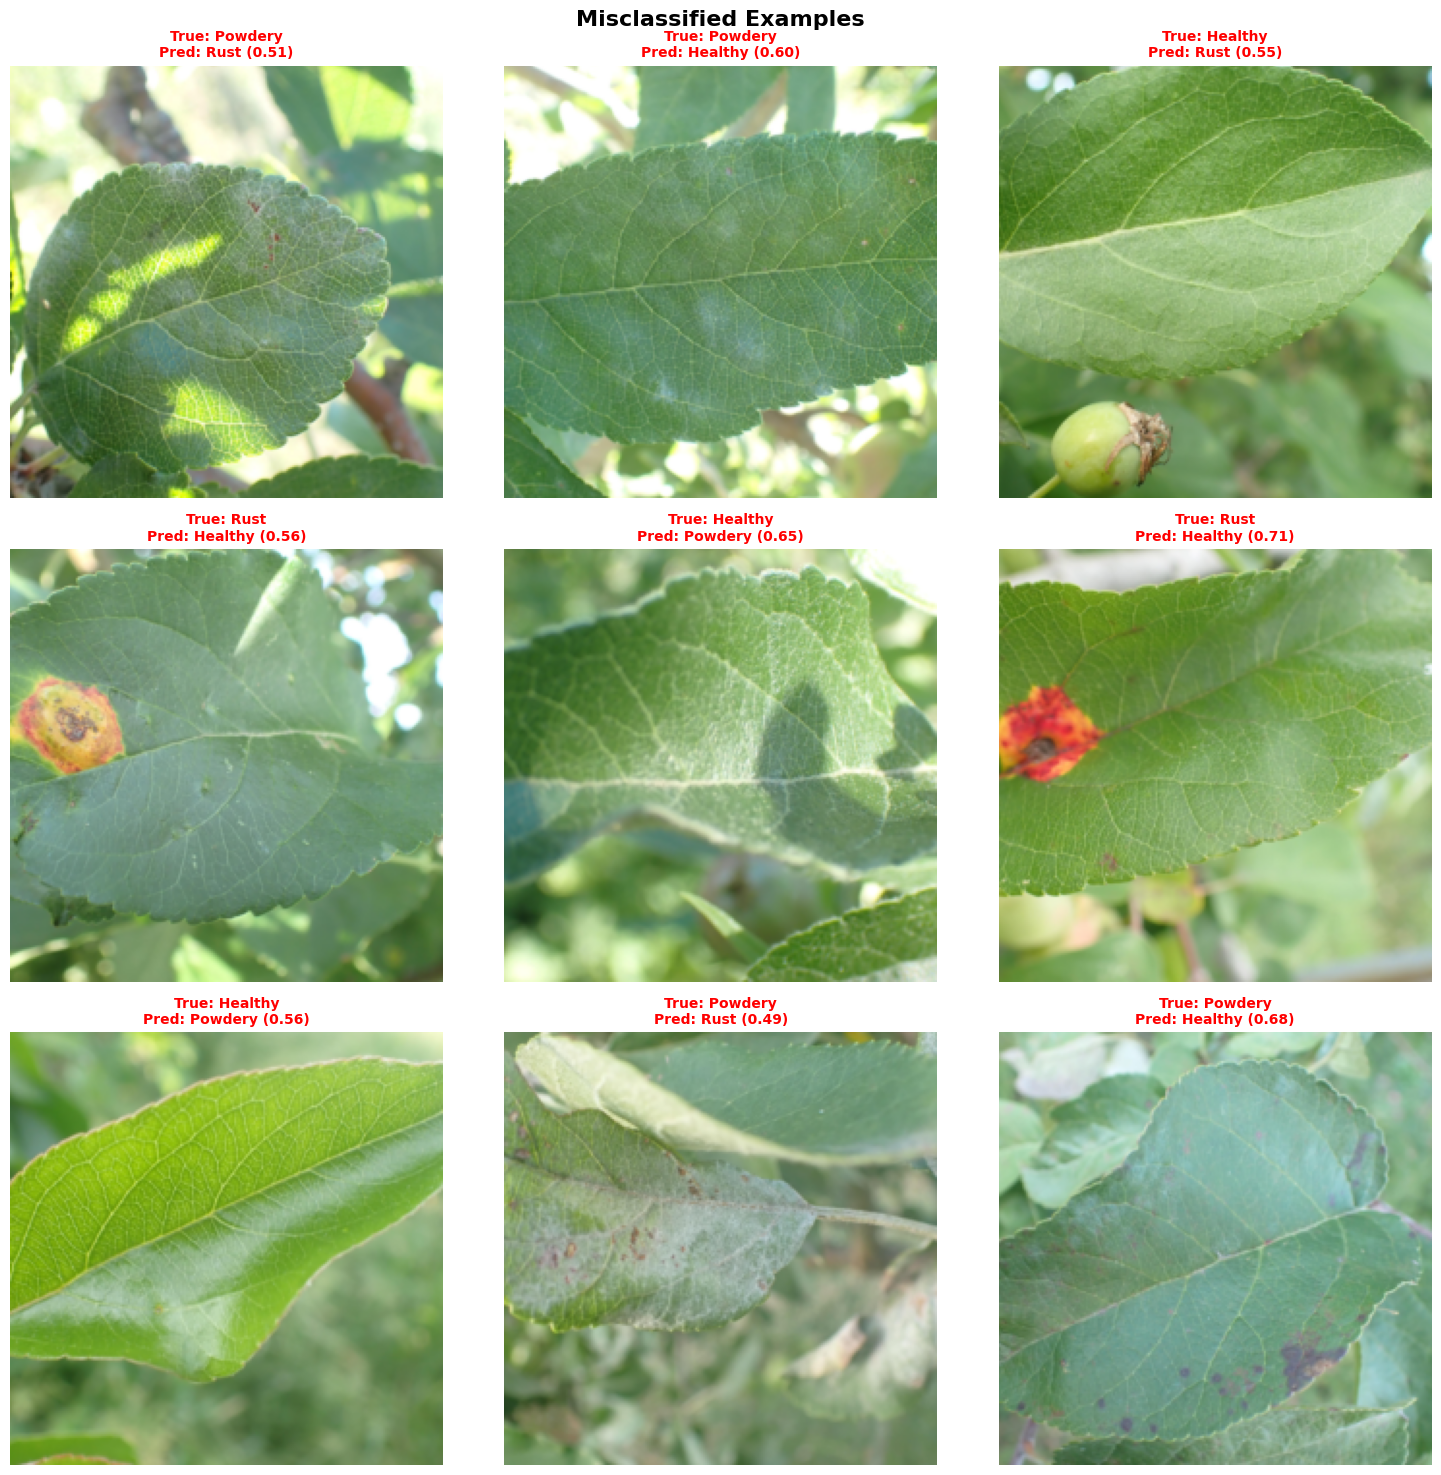


✅ EVALUATION COMPLETE!

📊 Final Results:
   • Test Accuracy: 93.33%
   • Misclassified: 10/150
   • ROC AUC (micro): 0.9903

💾 Saved files:
   • confusion_matrix.png
   • classification_report.txt
   • roc_curves.png
   • gradcam_visualization.png
   • misclassified_examples.png

🎯 Ready for Cell 6: Deployment & Streamlit Demo!

💡 What's next:
   • ONNX export for mobile deployment
   • Model quantization (reduce size)
   • Test-time augmentation (TTA)
   • Streamlit web demo with Grad-CAM
   • Batch inference script


In [ ]:
# CELL 5: Evaluation & Grad-CAM Visualization
# ============================================================================
# This cell:
# 1. Evaluates model on test set
# 2. Generates confusion matrix
# 3. Calculates per-class metrics (Precision, Recall, F1)
# 4. Implements Grad-CAM++ for both DenseNet and EfficientNet streams
# 5. Visualizes attention maps
# 6. Shows misclassified examples
# 7. Computes ROC curves
# ============================================================================

import json
import torch
import torch.nn as nn
import torch.nn.functional as F
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import cv2
from tqdm.auto import tqdm

# Load configuration
WORKSPACE = Path("/content/plant_disease_workspace")
with open(WORKSPACE / 'config.json', 'r') as f:
    config = json.load(f)

CLASS_NAMES = config['class_names']
NUM_CLASSES = config['num_classes']
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("🔍 Starting Model Evaluation\n")
print(f"📁 Classes: {CLASS_NAMES}")
print(f"📱 Device: {device}\n")

# ============================================================================
# LOAD BEST MODEL
# ============================================================================

# Use the actual checkpoint location from Drive
CHECKPOINT_DIR = Path("/content/drive/MyDrive/plant_disease_model")
checkpoint_path = CHECKPOINT_DIR / 'best_model.pth'

if not checkpoint_path.exists():
    print(f"❌ Checkpoint not found at: {checkpoint_path}")
    print("\n💡 Make sure the setup cell ran successfully first!")
    raise FileNotFoundError("Checkpoint not found")

checkpoint = torch.load(checkpoint_path, map_location=device)

model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

print(f"✅ Best model loaded (Val Acc: {checkpoint['val_acc']:.2f}%)\n")

# ============================================================================
# TEST SET EVALUATION
# ============================================================================

print("📊 Evaluating on test set...\n")

all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Testing"):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        probs = F.softmax(outputs, dim=1)
        _, predicted = outputs.max(1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

# Calculate test accuracy
test_acc = 100. * np.sum(all_preds == all_labels) / len(all_labels)

print(f"\n✅ Test Set Accuracy: {test_acc:.2f}%\n")

# ============================================================================
# CONFUSION MATRIX
# ============================================================================

print("📈 Generating confusion matrix...\n")

cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES,
            cbar_kws={'label': 'Count'}, ax=ax)
ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax.set_title(f'Confusion Matrix - Test Set\nAccuracy: {test_acc:.2f}%',
             fontsize=14, fontweight='bold')

# Add accuracy per class
for i in range(len(CLASS_NAMES)):
    class_acc = 100. * cm[i, i] / cm[i].sum()
    ax.text(len(CLASS_NAMES) + 0.5, i + 0.5, f'{class_acc:.1f}%',
            ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(WORKSPACE / 'confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================================================
# CLASSIFICATION REPORT
# ============================================================================

print("📋 Classification Report:\n")
report = classification_report(all_labels, all_preds,
                                target_names=CLASS_NAMES,
                                digits=4)
print(report)

# Save report
with open(WORKSPACE / 'classification_report.txt', 'w') as f:
    f.write(f"Test Set Accuracy: {test_acc:.2f}%\n\n")
    f.write(report)

# ============================================================================
# ROC CURVES
# ============================================================================

print("\n📈 Generating ROC curves...\n")

# Binarize labels for ROC
all_labels_bin = label_binarize(all_labels, classes=range(NUM_CLASSES))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot individual ROC curves
for i, class_name in enumerate(CLASS_NAMES):
    fpr, tpr, _ = roc_curve(all_labels_bin[:, i], all_probs[:, i])
    roc_auc = auc(fpr, tpr)
    axes[0].plot(fpr, tpr, linewidth=2,
                label=f'{class_name} (AUC = {roc_auc:.3f})')

axes[0].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
axes[0].set_xlabel('False Positive Rate', fontsize=12)
axes[0].set_ylabel('True Positive Rate', fontsize=12)
axes[0].set_title('ROC Curves - Per Class', fontsize=14, fontweight='bold')
axes[0].legend(loc='lower right', fontsize=10)
axes[0].grid(alpha=0.3)

# Plot micro-average ROC
fpr_micro, tpr_micro, _ = roc_curve(all_labels_bin.ravel(), all_probs.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

axes[1].plot(fpr_micro, tpr_micro, linewidth=3,
            label=f'Micro-average (AUC = {roc_auc_micro:.3f})', color='navy')
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].set_title('ROC Curve - Micro-Average', fontsize=14, fontweight='bold')
axes[1].legend(loc='lower right', fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(WORKSPACE / 'roc_curves.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================================================
# GRAD-CAM++ IMPLEMENTATION
# ============================================================================

print("\n🔬 Implementing Grad-CAM++ for attention visualization...\n")

class GradCAMPlusPlus:
    """Grad-CAM++ for visualizing model attention"""
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None

        # Register hooks
        target_layer.register_forward_hook(self.save_activation)
        target_layer.register_full_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output.detach()

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()

    def generate_cam(self, input_image, target_class=None):
        """Generate Grad-CAM++ heatmap"""
        self.model.eval()

        # Forward pass
        output = self.model(input_image)

        if target_class is None:
            target_class = output.argmax(dim=1)

        # Backward pass
        self.model.zero_grad()
        one_hot = torch.zeros_like(output)
        one_hot[0, target_class] = 1
        output.backward(gradient=one_hot, retain_graph=True)

        # Get gradients and activations
        gradients = self.gradients[0]  # [C, H, W]
        activations = self.activations[0]  # [C, H, W]

        # Grad-CAM++ calculation
        alpha_num = gradients.pow(2)
        alpha_denom = 2 * gradients.pow(2) + \
                      (activations * gradients.pow(3)).sum(dim=(1, 2), keepdim=True)
        alpha_denom = torch.where(alpha_denom != 0, alpha_denom, torch.ones_like(alpha_denom))
        alpha = alpha_num / alpha_denom

        weights = (alpha * F.relu(gradients)).sum(dim=(1, 2), keepdim=True)
        cam = (weights * activations).sum(dim=0)

        # Normalize
        cam = F.relu(cam)
        cam = cam - cam.min()
        cam = cam / (cam.max() + 1e-8)

        return cam.cpu().numpy()

# Get target layers for both streams
densenet_target = model.densenet_stream.features[-1]  # Last dense block
efficientnet_target = model.efficientnet_stream.model.conv_head  # Last conv layer

gradcam_densenet = GradCAMPlusPlus(model, densenet_target)
gradcam_efficientnet = GradCAMPlusPlus(model, efficientnet_target)

print("✅ Grad-CAM++ initialized for both streams\n")

# ============================================================================
# VISUALIZE GRAD-CAM FOR SAMPLE IMAGES
# ============================================================================

print("🎨 Generating Grad-CAM visualizations...\n")

def overlay_heatmap(img, heatmap, alpha=0.4):
    """Overlay heatmap on image"""
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    superimposed = heatmap * alpha + img * (1 - alpha)
    superimposed = np.clip(superimposed, 0, 255).astype(np.uint8)
    return superimposed

def denormalize_image(tensor):
    """Denormalize image tensor"""
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    tensor = tensor * std + mean
    return tensor

# Select random samples from each class
samples_per_class = 2
fig, axes = plt.subplots(len(CLASS_NAMES), samples_per_class * 3,
                         figsize=(18, len(CLASS_NAMES) * 3))

for class_idx, class_name in enumerate(CLASS_NAMES):
    # Find samples of this class
    class_indices = np.where(all_labels == class_idx)[0]
    selected_indices = np.random.choice(class_indices, samples_per_class, replace=False)

    for sample_idx, idx in enumerate(selected_indices):
        # Get image
        img_tensor = test_dataset[idx][0].unsqueeze(0).to(device)
        true_label = test_dataset[idx][1]

        # Generate predictions
        with torch.no_grad():
            output = model(img_tensor)
            pred_label = output.argmax(dim=1).item()
            confidence = F.softmax(output, dim=1)[0, pred_label].item()

        # Generate Grad-CAM for both streams
        cam_densenet = gradcam_densenet.generate_cam(img_tensor, pred_label)
        cam_efficientnet = gradcam_efficientnet.generate_cam(img_tensor, pred_label)

        # Prepare image for visualization
        img_np = denormalize_image(img_tensor.cpu()[0]).permute(1, 2, 0).numpy()
        img_np = np.clip(img_np * 255, 0, 255).astype(np.uint8)

        # Create overlays
        overlay_densenet = overlay_heatmap(img_np, cam_densenet)
        overlay_efficientnet = overlay_heatmap(img_np, cam_efficientnet)

        # Plot
        col_offset = sample_idx * 3

        # Original image
        axes[class_idx, col_offset].imshow(img_np)
        axes[class_idx, col_offset].set_title(
            f'{class_name}\nPred: {CLASS_NAMES[pred_label]} ({confidence:.2f})',
            fontsize=9, fontweight='bold'
        )
        axes[class_idx, col_offset].axis('off')

        # DenseNet Grad-CAM
        axes[class_idx, col_offset + 1].imshow(overlay_densenet)
        axes[class_idx, col_offset + 1].set_title('DenseNet + CBAM', fontsize=9)
        axes[class_idx, col_offset + 1].axis('off')

        # EfficientNet Grad-CAM
        axes[class_idx, col_offset + 2].imshow(overlay_efficientnet)
        axes[class_idx, col_offset + 2].set_title('EfficientNet + SE', fontsize=9)
        axes[class_idx, col_offset + 2].axis('off')

plt.suptitle('Grad-CAM++ Visualization - Dual Stream Attention',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig(WORKSPACE / 'gradcam_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Grad-CAM visualizations saved!\n")

# ============================================================================
# MISCLASSIFIED EXAMPLES
# ============================================================================

print("🔍 Analyzing misclassified examples...\n")

misclassified_indices = np.where(all_preds != all_labels)[0]
num_misclassified = len(misclassified_indices)

print(f"❌ Total misclassified: {num_misclassified} / {len(all_labels)} ({100*num_misclassified/len(all_labels):.2f}%)\n")

if num_misclassified > 0:
    # Show up to 9 misclassified examples
    num_show = min(9, num_misclassified)
    selected_misclassified = np.random.choice(misclassified_indices, num_show, replace=False)

    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()

    for idx, mis_idx in enumerate(selected_misclassified):
        # Get image
        img_tensor = test_dataset[mis_idx][0].unsqueeze(0).to(device)
        true_label = all_labels[mis_idx]
        pred_label = all_preds[mis_idx]
        confidence = all_probs[mis_idx, pred_label]

        # Denormalize and display
        img_np = denormalize_image(img_tensor.cpu()[0]).permute(1, 2, 0).numpy()
        img_np = np.clip(img_np * 255, 0, 255).astype(np.uint8)

        axes[idx].imshow(img_np)
        axes[idx].set_title(
            f'True: {CLASS_NAMES[true_label]}\n'
            f'Pred: {CLASS_NAMES[pred_label]} ({confidence:.2f})',
            fontsize=10, fontweight='bold', color='red'
        )
        axes[idx].axis('off')

    # Hide unused subplots
    for idx in range(num_show, 9):
        axes[idx].axis('off')

    plt.suptitle('Misclassified Examples', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(WORKSPACE / 'misclassified_examples.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("🎉 Perfect classification! No misclassified examples!\n")

# ============================================================================
# SAVE EVALUATION RESULTS
# ============================================================================

config['evaluation'] = {
    'test_accuracy': float(test_acc),
    'num_test_samples': len(all_labels),
    'num_misclassified': int(num_misclassified),
    'confusion_matrix': cm.tolist(),
    'roc_auc_micro': float(roc_auc_micro)
}

with open(WORKSPACE / 'config.json', 'w') as f:
    json.dump(config, f, indent=2)

print("\n" + "="*60)
print("✅ EVALUATION COMPLETE!")
print("="*60)
print(f"\n📊 Final Results:")
print(f"   • Test Accuracy: {test_acc:.2f}%")
print(f"   • Misclassified: {num_misclassified}/{len(all_labels)}")
print(f"   • ROC AUC (micro): {roc_auc_micro:.4f}")

print(f"\n💾 Saved files:")
print(f"   • confusion_matrix.png")
print(f"   • classification_report.txt")
print(f"   • roc_curves.png")
print(f"   • gradcam_visualization.png")
if num_misclassified > 0:
    print(f"   • misclassified_examples.png")

print("\n" + "="*60)
print("🎯 Ready for Cell 6: Deployment & Streamlit Demo!")
print("="*60)
print("\n💡 What's next:")
print("   • ONNX export for mobile deployment")
print("   • Model quantization (reduce size)")
print("   • Test-time augmentation (TTA)")
print("   • Streamlit web demo with Grad-CAM")
print("   • Batch inference script")

# New Section

In [ ]:
# ============================================================================
# CELL 6A: Save Model to Drive & Test New Images
# ============================================================================
# This cell:
# 1. Saves the best model permanently to your Google Drive
# 2. Allows you to upload new test images from your computer
# 3. Runs inference with Grad-CAM visualization
# 4. Shows predictions with confidence scores for both streams
# 5. Saves results to Drive
# ============================================================================
import os
import json
import torch
import torch.nn.functional as F
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as T
from google.colab import files
import cv2
from IPython.display import display, HTML
import shutil

# Load configuration
WORKSPACE = Path("/content/plant_disease_workspace")
with open(WORKSPACE / 'config.json', 'r') as f:
    config = json.load(f)

CLASS_NAMES = config['class_names']
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("="*70)
print("💾 STEP 1: SAVE MODEL TO GOOGLE DRIVE")
print("="*70)
print()

# ============================================================================
# SAVE MODEL TO GOOGLE DRIVE
# ============================================================================

# Define Drive save location
DRIVE_MODEL_PATH = Path("/content/drive/MyDrive/plant_disease_model")
DRIVE_MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Copy the best model
CHECKPOINT_DIR = WORKSPACE / 'checkpoints'
source_model = CHECKPOINT_DIR / 'best_model.pth'
dest_model = DRIVE_MODEL_PATH / 'best_model.pth'

if source_model.exists():
    shutil.copy2(source_model, dest_model)
    print(f"✅ Model saved to Drive!")
    print(f"   📁 Location: {dest_model}")

    # Get model size
    model_size_mb = dest_model.stat().st_size / (1024 * 1024)
    print(f"   📦 Size: {model_size_mb:.1f} MB")

    # Save metadata
    metadata = {
        'model_name': 'DenseNet121-EfficientNetB3-Hybrid',
        'test_accuracy': config['evaluation']['test_accuracy'],
        'num_classes': len(CLASS_NAMES),
        'class_names': CLASS_NAMES,
        'input_size': [224, 224],
        'normalization': {
            'mean': [0.485, 0.456, 0.406],
            'std': [0.229, 0.224, 0.225]
        }
    }

    with open(DRIVE_MODEL_PATH / 'model_info.json', 'w') as f:
        json.dump(metadata, f, indent=2)

    print(f"   📋 Metadata saved: model_info.json")
    print()
    print(f"🎉 Your model is now safely stored in Google Drive!")
    print(f"   You can download it or use it in future sessions.")
    print()
else:
    print("⚠️  Best model not found. Please run training first (Cell 4).")
    print()

# ============================================================================
# UPLOAD NEW TEST IMAGES
# ============================================================================

print("="*70)
print("📤 STEP 2: UPLOAD NEW TEST IMAGES")
print("="*70)
print()
print("Click 'Choose Files' below to upload plant images from your computer")
print("Supported formats: JPG, JPEG, PNG")
print("You can upload multiple images at once!")
print()

# Upload files
uploaded = files.upload()

if not uploaded:
    print("\n⚠️  No files uploaded. Skipping inference.")
else:
    print(f"\n✅ Uploaded {len(uploaded)} image(s)")
    print()

    # ========================================================================
    # PREPARE INFERENCE
    # ========================================================================

    print("="*70)
    print("🔬 STEP 3: RUNNING INFERENCE WITH GRAD-CAM")
    print("="*70)
    print()

    # Preprocessing transform
    transform = T.Compose([
        T.Resize(256),
        T.CenterCrop(224),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    def denormalize_image(tensor):
        """Denormalize for visualization"""
        mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
        std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
        return tensor * std + mean

    def overlay_heatmap(img, heatmap, alpha=0.5):
        """Overlay heatmap on image"""
        heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
        heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
        heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
        superimposed = heatmap * alpha + img * (1 - alpha)
        return np.clip(superimposed, 0, 255).astype(np.uint8)

    # ========================================================================
    # GRAD-CAM SETUP
    # ========================================================================

    class GradCAMPlusPlus:
        def __init__(self, model, target_layer):
            self.model = model
            self.target_layer = target_layer
            self.gradients = None
            self.activations = None
            target_layer.register_forward_hook(self.save_activation)
            target_layer.register_full_backward_hook(self.save_gradient)

        def save_activation(self, module, input, output):
            self.activations = output.detach()

        def save_gradient(self, module, grad_input, grad_output):
            self.gradients = grad_output[0].detach()

        def generate_cam(self, input_image, target_class=None):
            self.model.eval()
            output = self.model(input_image)

            if target_class is None:
                target_class = output.argmax(dim=1)

            self.model.zero_grad()
            one_hot = torch.zeros_like(output)
            one_hot[0, target_class] = 1
            output.backward(gradient=one_hot, retain_graph=True)

            gradients = self.gradients[0]
            activations = self.activations[0]

            alpha_num = gradients.pow(2)
            alpha_denom = 2 * gradients.pow(2) + \
                          (activations * gradients.pow(3)).sum(dim=(1, 2), keepdim=True)
            alpha_denom = torch.where(alpha_denom != 0, alpha_denom, torch.ones_like(alpha_denom))
            alpha = alpha_num / alpha_denom

            weights = (alpha * F.relu(gradients)).sum(dim=(1, 2), keepdim=True)
            cam = (weights * activations).sum(dim=0)
            cam = F.relu(cam)
            cam = cam - cam.min()
            cam = cam / (cam.max() + 1e-8)

            return cam.cpu().numpy()

    # Initialize Grad-CAM for both streams
    gradcam_densenet = GradCAMPlusPlus(model, model.densenet_stream.features[-1])
    gradcam_efficientnet = GradCAMPlusPlus(model, model.efficientnet_stream.model.conv_head)

    # ========================================================================
    # PROCESS EACH UPLOADED IMAGE
    # ========================================================================

    results_dir = WORKSPACE / 'new_predictions'
    results_dir.mkdir(exist_ok=True)

    all_results = []

    for filename, file_bytes in uploaded.items():
        print(f"📸 Processing: {filename}")
        print("-" * 70)

        # Load and preprocess image
        try:
            # Save uploaded file temporarily
            temp_path = Path(filename)
            temp_path.write_bytes(file_bytes)

            # Load image
            img_pil = Image.open(temp_path).convert('RGB')
            img_tensor = transform(img_pil).unsqueeze(0).to(device)

            # Get prediction
            model.eval()
            with torch.no_grad():
                output = model(img_tensor)
                probs = F.softmax(output, dim=1)[0]
                pred_idx = output.argmax(dim=1).item()
                confidence = probs[pred_idx].item()

            # Generate Grad-CAM for both streams
            cam_densenet = gradcam_densenet.generate_cam(img_tensor, pred_idx)
            cam_efficientnet = gradcam_efficientnet.generate_cam(img_tensor, pred_idx)

            # Prepare images for visualization
            img_np = denormalize_image(img_tensor.cpu()[0]).permute(1, 2, 0).numpy()
            img_np = np.clip(img_np * 255, 0, 255).astype(np.uint8)

            overlay_densenet = overlay_heatmap(img_np, cam_densenet)
            overlay_efficientnet = overlay_heatmap(img_np, cam_efficientnet)

            # Create visualization
            fig, axes = plt.subplots(1, 4, figsize=(20, 5))

            # Original image
            axes[0].imshow(img_np)
            axes[0].set_title('Original Image', fontsize=12, fontweight='bold')
            axes[0].axis('off')

            # Prediction with probabilities
            axes[1].barh(CLASS_NAMES, probs.cpu().numpy(), color=['#2ecc71', '#e74c3c', '#f39c12'])
            axes[1].set_xlabel('Confidence', fontsize=12)
            axes[1].set_title(f'Prediction: {CLASS_NAMES[pred_idx]}\nConfidence: {confidence:.1%}',
                             fontsize=12, fontweight='bold')
            axes[1].set_xlim([0, 1])
            axes[1].grid(axis='x', alpha=0.3)

            # DenseNet + CBAM attention
            axes[2].imshow(overlay_densenet)
            axes[2].set_title('DenseNet-121 + CBAM\nAttention Map', fontsize=12, fontweight='bold')
            axes[2].axis('off')

            # EfficientNet + SE attention
            axes[3].imshow(overlay_efficientnet)
            axes[3].set_title('EfficientNet-B3 + SE\nAttention Map', fontsize=12, fontweight='bold')
            axes[3].axis('off')

            plt.suptitle(f'Analysis: {filename}', fontsize=14, fontweight='bold', y=0.98)
            plt.tight_layout()

            # Save figure
            save_path = results_dir / f"{Path(filename).stem}_analysis.png"
            plt.savefig(save_path, dpi=150, bbox_inches='tight')
            plt.show()

            # Store results
            result = {
                'filename': filename,
                'prediction': CLASS_NAMES[pred_idx],
                'confidence': float(confidence),
                'all_probabilities': {name: float(prob) for name, prob in zip(CLASS_NAMES, probs.cpu().numpy())}
            }
            all_results.append(result)

            # Print summary
            print(f"   ✅ Prediction: {CLASS_NAMES[pred_idx]}")
            print(f"   📊 Confidence: {confidence:.1%}")
            print(f"   📈 All probabilities:")
            for name, prob in zip(CLASS_NAMES, probs.cpu().numpy()):
                bar = "█" * int(prob * 20)
                print(f"      • {name:10s}: {prob:.1%} {bar}")
            print(f"   💾 Saved: {save_path.name}")
            print()

            # Clean up
            temp_path.unlink()

        except Exception as e:
            print(f"   ❌ Error processing {filename}: {e}")
            print()
            continue

    # ========================================================================
    # SAVE RESULTS TO DRIVE
    # ========================================================================

    if all_results:
        print("="*70)
        print("💾 SAVING RESULTS TO GOOGLE DRIVE")
        print("="*70)
        print()

        # Save predictions as JSON
        predictions_file = DRIVE_MODEL_PATH / 'new_predictions.json'
        with open(predictions_file, 'w') as f:
            json.dump(all_results, f, indent=2)

        print(f"✅ Predictions saved to: {predictions_file}")

        # Copy visualization images to Drive
        drive_results_dir = DRIVE_MODEL_PATH / 'prediction_visualizations'
        drive_results_dir.mkdir(exist_ok=True)

        for img_file in results_dir.glob("*.png"):
            shutil.copy2(img_file, drive_results_dir / img_file.name)

        print(f"✅ Visualizations saved to: {drive_results_dir}")
        print()

        # ====================================================================
        # SUMMARY REPORT
        # ====================================================================

        print("="*70)
        print("📊 INFERENCE SUMMARY")
        print("="*70)
        print()
        print(f"Total images processed: {len(all_results)}")
        print()

        # Count predictions by class
        pred_counts = {}
        for result in all_results:
            pred = result['prediction']
            pred_counts[pred] = pred_counts.get(pred, 0) + 1

        print("Predictions breakdown:")
        for class_name in CLASS_NAMES:
            count = pred_counts.get(class_name, 0)
            percentage = 100 * count / len(all_results) if all_results else 0
            bar = "█" * int(percentage / 5)
            print(f"   • {class_name:10s}: {count:2d} ({percentage:5.1f}%) {bar}")

        print()
        print(f"Average confidence: {np.mean([r['confidence'] for r in all_results]):.1%}")
        print()

        # High/Low confidence predictions
        sorted_results = sorted(all_results, key=lambda x: x['confidence'], reverse=True)

        print("Highest confidence predictions:")
        for i, result in enumerate(sorted_results[:3], 1):
            print(f"   {i}. {result['filename']}: {result['prediction']} ({result['confidence']:.1%})")

        print()

        if len(sorted_results) > 3:
            print("Lowest confidence predictions:")
            for i, result in enumerate(sorted_results[-3:], 1):
                print(f"   {i}. {result['filename']}: {result['prediction']} ({result['confidence']:.1%})")

        print()
        print("="*70)
        print("✅ ALL DONE!")
        print("="*70)
        print()
        print("📁 Your files are saved in Google Drive:")
        print(f"   • Model: {DRIVE_MODEL_PATH / 'best_model.pth'}")
        print(f"   • Predictions: {predictions_file}")
        print(f"   • Visualizations: {drive_results_dir}")
        print()
        print("🎯 You can now:")
        print("   1. Download the model for deployment")
        print("   2. Upload more images for testing")
        print("   3. Proceed to Cell 6B for Streamlit demo")

print()
print("="*70)
print("🎉 INFERENCE SESSION COMPLETE!")
print("="*70)

💾 STEP 1: SAVE MODEL TO GOOGLE DRIVE

⚠️  Best model not found. Please run training first (Cell 4).

📤 STEP 2: UPLOAD NEW TEST IMAGES

Click 'Choose Files' below to upload plant images from your computer
Supported formats: JPG, JPEG, PNG
You can upload multiple images at once!



Saving 9ec7295cb1d44c2d.jpg to 9ec7295cb1d44c2d.jpg

✅ Uploaded 1 image(s)

🔬 STEP 3: RUNNING INFERENCE WITH GRAD-CAM

📸 Processing: 9ec7295cb1d44c2d.jpg
----------------------------------------------------------------------


   ✅ Prediction: Powdery
   📊 Confidence: 93.3%
   📈 All probabilities:
      • Healthy   : 5.2% █
      • Powdery   : 93.3% ██████████████████
      • Rust      : 1.5% 
   💾 Saved: 9ec7295cb1d44c2d_analysis.png

💾 SAVING RESULTS TO GOOGLE DRIVE

✅ Predictions saved to: /content/drive/MyDrive/plant_disease_model/new_predictions.json
✅ Visualizations saved to: /content/drive/MyDrive/plant_disease_model/prediction_visualizations

📊 INFERENCE SUMMARY

Total images processed: 1

Predictions breakdown:
   • Healthy   :  0 (  0.0%) 
   • Powdery   :  1 (100.0%) ████████████████████
   • Rust      :  0 (  0.0%) 

Average confidence: 93.3%

Highest confidence predictions:
   1. 9ec7295cb1d44c2d.jpg: Powdery (93.3%)


✅ ALL DONE!

📁 Your files are saved in Google Drive:
   • Model: /content/drive/MyDrive/plant_disease_model/best_model.pth
   • Predictions: /content/drive/MyDrive/plant_disease_model/new_predictions.json
   • Visualizations: /content/drive/MyDrive/plant_disease_model/prediction_v

In [ ]:
# ================== CELL 7 — NEW GEMINI SDK (google-genai) ==================

!pip install -q google-genai

import torch
import torch.nn.functional as F
from google import genai
from google.genai import types
from google.colab import userdata

# ------------------ MODEL PREDICTION ------------------
model.eval()
with torch.no_grad():
    output = model(img_tensor)
    probs = F.softmax(output, dim=1)[0]
    pred_idx = output.argmax(1).item()
    confidence = probs[pred_idx].item() * 100

pred = CLASS_NAMES[pred_idx]

# ------------------ GEMINI CLIENT (NEW SDK) ------------------
API_KEY = userdata.get("GOOGLE_API_KEY")

client = genai.Client(api_key=API_KEY)

MODEL_NAME = "gemini-3-flash-preview"

# ------------------ SINGLE GEMINI CALL ------------------
def get_full_report():
    try:
        prompt = f"""
You are an AI Plant Doctor for Indian farmers.

Disease: {pred}
Confidence: {confidence:.1f}%

Respond in EXACTLY this structure:

WHY:
(one short sentence)

GENERAL_TREATMENT:
1. CHEMICAL →
2. ORGANIC →
3. PREVENT →

PROBLEMS:
1.
2.
3.

CROP_CURE:
WHEAT:
1. CHEMICAL →
2. ORGANIC →
3. PREVENT →

MAIZE:
1. CHEMICAL →
2. ORGANIC →
3. PREVENT →

RICE:
1. CHEMICAL →
2. ORGANIC →
3. PREVENT →

BENGALI:
(translate CROP_CURE)

HINDI:
(translate CROP_CURE)
"""

        contents = [
            types.Content(
                role="user",
                parts=[types.Part.from_text(prompt)],
            )
        ]

        config = types.GenerateContentConfig(
            thinking_config=types.ThinkingConfig(thinking_level="LOW"),
            temperature=0.3,
            max_output_tokens=700,
        )

        response = client.models.generate_content(
            model=MODEL_NAME,
            contents=contents,
            config=config,
        )

        return response.text

    except Exception:
        return None

report = get_full_report()

# ------------------ PARSING ------------------
def extract(tag, text):
    try:
        return text.split(f"{tag}:")[1].split("\n\n")[0].strip()
    except:
        return "⚠️ Not available"

if report is None:
    why = "⚠️ Gemini response unavailable."
    general_cure = "⚠️ Gemini response unavailable."
    secondary = "⚠️ Gemini response unavailable."
    crop_cures = "⚠️ Gemini response unavailable."
    bengali_crop = "উপলব্ধ নয়"
    hindi_crop = "उपलब्ध नहीं"
else:
    why = extract("WHY", report)
    general_cure = extract("GENERAL_TREATMENT", report)
    secondary = extract("PROBLEMS", report)
    crop_cures = extract("CROP_CURE", report)
    bengali_crop = extract("BENGALI", report)
    hindi_crop = extract("HINDI", report)

# ------------------ FINAL OUTPUT (UNCHANGED FORMAT) ------------------
print("\n" + "═" * 95)
print("AI PLANT DOCTOR (भारत के किसान के लिए) | কৃষকদের জন্য এআই প্ল্যান্ট ডাক্তার".center(95))
print("═" * 95)
print(f"निदान / নিদান (DIAGNOSIS): {pred.upper()} ({confidence:.1f}%)\n")

print("क्यों? / কেন? (WHY?)")
print(f"→ {why}\n")

print("सामान्य इलाज / সাধারণ চিকিৎসा (GENERAL TREATMENT)")
print(general_cure)

if pred != "Healthy":
    print("\nरोग के ५ बड़े नुकसान / রোগের কারণে ৫টি বড় সমস্যা")
    print(secondary)

print("\nगेहूं, मक्का, धान के लिए इलाज / গম, ভুট্টা, ধানের জন্য চিকিৎসा")
print(crop_cures)

print("\n" + "বাংলায় চিকিৎসা / বাংলায় চিকিৎসা".center(95))
print(bengali_crop)

print("\n" + "हिन्दी में इलाज / हिन्दी में उपचार".center(95))
print(hindi_crop)

print("═" * 95)



═══════════════════════════════════════════════════════════════════════════════════════════════
          AI PLANT DOCTOR (भारत के किसान के लिए) | কৃষকদের জন্য এআই প্ল্যান্ট ডাক্তার          
═══════════════════════════════════════════════════════════════════════════════════════════════
निदान / নিদান (DIAGNOSIS): POWDERY (93.3%)

क्यों? / কেন? (WHY?)
→ ⚠️ Gemini response unavailable.

सामान्य इलाज / সাধারণ চিকিৎসा (GENERAL TREATMENT)
⚠️ Gemini response unavailable.

रोग के ५ बड़े नुकसान / রোগের কারণে ৫টি বড় সমস্যা
⚠️ Gemini response unavailable.

गेहूं, मक्का, धान के लिए इलाज / গম, ভুট্টা, ধানের জন্য চিকিৎসा
⚠️ Gemini response unavailable.

                                বাংলায় চিকিৎসা / বাংলায় চিকিৎসা                               
উপলব্ধ নয়

                               हिन्दी में इलाज / हिन्दी में उपचार                              
उपलब्ध नहीं
═══════════════════════════════════════════════════════════════════════════════════════════════
